In [1]:
import base64
import io

import numpy as np
import pandas as pd

from PIL import Image

import matplotlib.pyplot as plt
import cv2

import requests

In [2]:
data = pd.read_csv('../dataset/preprocessed_data.csv')

In [3]:
idx = 1

In [4]:
mask_path = data.loc[idx, 'mask']
img_path = data.loc[idx, 'images']

In [5]:
img = Image.open(img_path)

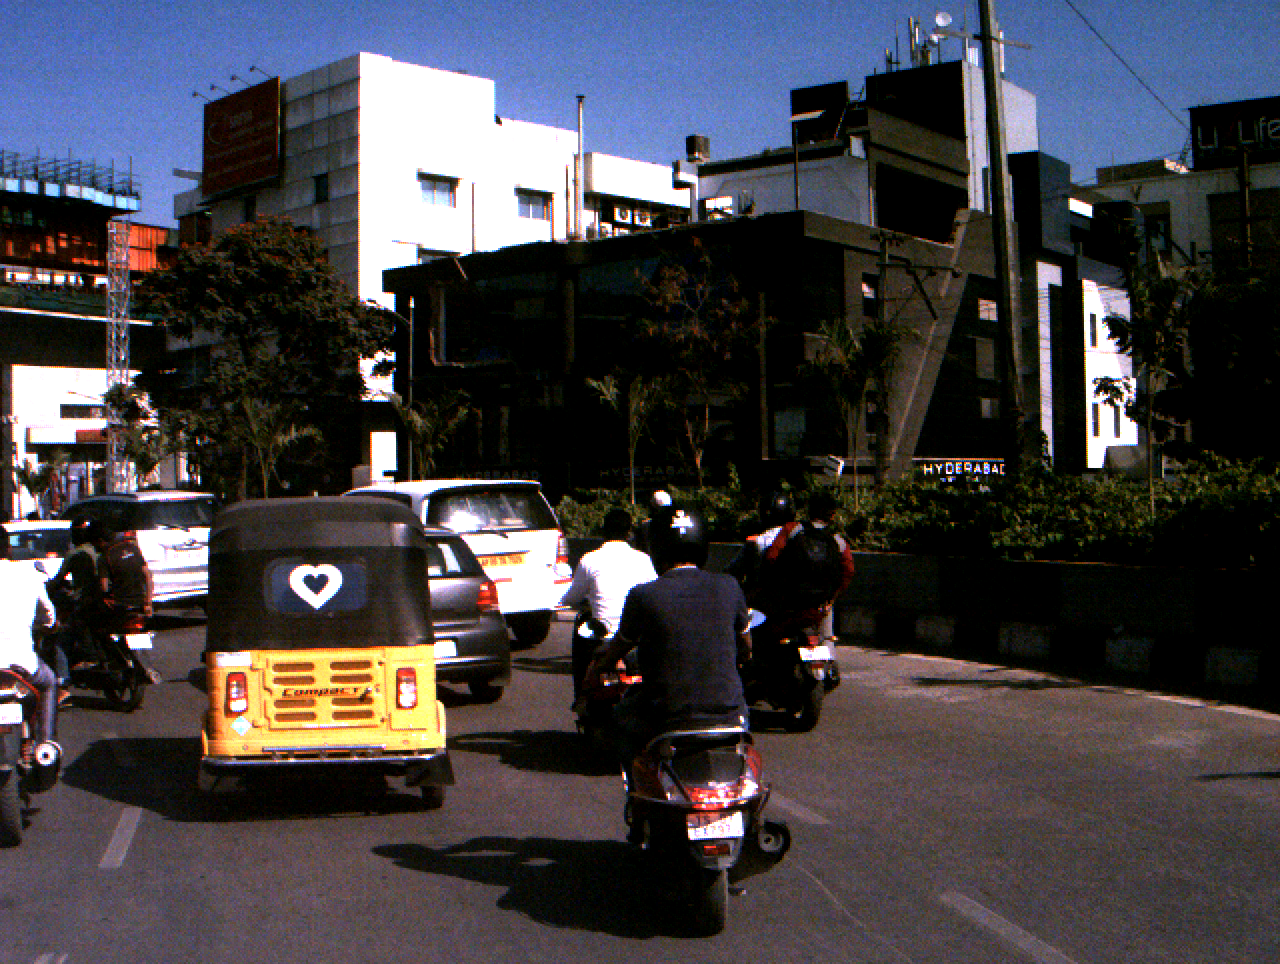

In [6]:
img

In [7]:
np_img = np.array(img)

In [8]:
np_img.min(), np_img.max()

(0, 255)

In [9]:
np_img.shape

(964, 1280, 3)

## Encoding Image Array to Byte String

In [10]:
def encode_arr(array):
    pil_img = Image.fromarray((array).astype(np.uint8), 'RGB')
    buffered = io.BytesIO()
    pil_img.save(buffered, format="JPEG")
    img_bytes = base64.b64encode(buffered.getvalue())

    img_string = img_bytes.decode()
    
    return img_string

## Decoding Byte String Data

In [11]:
def decode_data(encd_str):
    img = Image.open(io.BytesIO(base64.decodebytes(bytes(encd_str, "utf-8"))))
    
    np_arr = np.array(img)
    
    return np_arr

# Testing Custom image

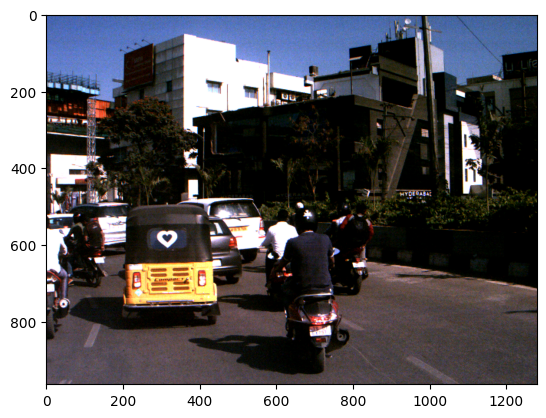

In [12]:
plt.imshow((np_img))
plt.show()

In [13]:
np_img.shape

(964, 1280, 3)

In [14]:
#converting image to base64 string
inp_str = encode_arr(np_img)

In [15]:
#Request Body for the API
data = {"image": inp_str}

In [16]:
response = requests.post("http://127.0.0.1:8000/predict", 
                        json = data)

In [17]:
response.status_code

200

In [18]:
result = response.json()

In [19]:
result.keys()

dict_keys(['output'])

In [20]:
output_str = result['output']

In [21]:
output_arr = decode_data(output_str)

In [22]:
output_arr.shape

(1280, 964, 3)

In [23]:
output_arr = output_arr.transpose(1,0,2)
output_arr = np.flipud(output_arr)

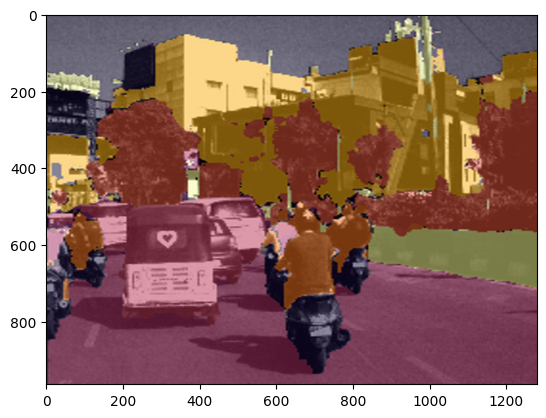

In [24]:
plt.imshow(output_arr)
plt.show()